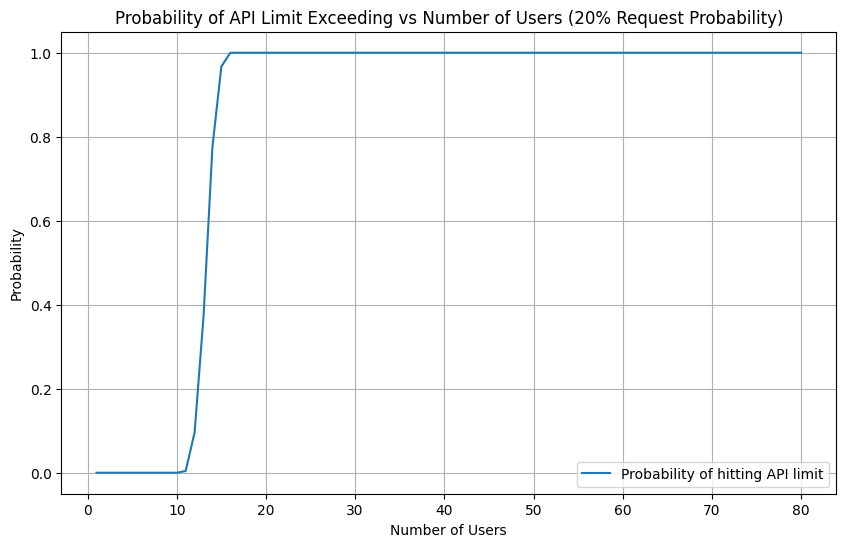

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Leaky Bucket 설정
bucket_capacity = 40  # 최대 토큰 수
leak_rate = 2  # 초당 누수되는 토큰 수
time_interval = 1  # 시뮬레이션 시간 간격 (초)
simulation_duration = 60  # 시뮬레이션 총 시간 (초)

# 사용자 요청 생성 함수
def generate_requests_with_probability(num_users, request_probability, duration):
    # 각 사용자에 대해 초당 요청 발생 여부를 20% 확률로 결정
    requests = np.zeros(duration)
    for _ in range(num_users):
        user_requests = np.random.choice([0, 1], size=duration, p=[1 - request_probability, request_probability])
        requests += user_requests
    return requests

# Leaky Bucket 시뮬레이션 함수
def simulate_leaky_bucket(num_users, bucket_capacity, leak_rate, request_probability, duration):
    requests = generate_requests_with_probability(num_users, request_probability, duration)
    bucket_tokens = 0
    limit_exceeded = False
    
    for t in range(duration):
        # 새로운 요청 처리
        bucket_tokens += requests[t]
        
        # 누수 처리
        bucket_tokens = max(0, bucket_tokens - leak_rate)
        
        # 제한 초과 확인
        if bucket_tokens > bucket_capacity:
            limit_exceeded = True
            break
    
    return limit_exceeded

# 사용자 수별 제한 도달 확률 계산
num_users_range = range(1, 81)  # 사용자 수 (1명부터 80명까지)
probabilities = []

for num_users in num_users_range:
    exceed_count = 0
    trials = 1000  # Monte Carlo 시뮬레이션 반복 횟수
    
    for _ in range(trials):
        if simulate_leaky_bucket(num_users, bucket_capacity, leak_rate, request_probability=0.2, duration=simulation_duration):
            exceed_count += 1
    
    probabilities.append(exceed_count / trials)

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(num_users_range, probabilities, label="Probability of hitting API limit")
plt.xlabel("Number of Users")
plt.ylabel("Probability")
plt.title("Probability of API Limit Exceeding vs Number of Users (20% Request Probability)")
plt.legend()
plt.grid()
plt.show()
